# Metrics Analysis For Plastic Parallel Programming Project

Generates good lookin graphs from metrics output files

In [46]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Program parameters:

In [47]:
folderPath       = '../Plastic-Parallel-Programming/build/runs/run'
rootword         = 'Experiment'
startingRun      = 1
numOfRuns        = 2
numOfExperiments = 1
numOfRepeats     = 5

Set files to read

In [48]:
fileNames = []

for i in range(numOfExperiments):
    for j in range(numOfRepeats):
        fileNames.append(rootword + str(i + 1) + "_Repeat" + str(j) + ".csv")
        
for j in range(numOfRepeats):
    fileNames.append(rootword + str(i + 1) + "_Repeat" + str(j) + ".csv")

Import the dataset

In [49]:
runs = []

for run in range(numOfRuns):
    runNum = startingRun + run
    files = []
    
    for fileName in fileNames:
        data_path = os.path.join(os.getcwd(), (folderPath + str(runNum)), fileName)
        files.append(pd.read_csv(data_path, sep=',|\t', engine='python'))
        
    runs.append(files)

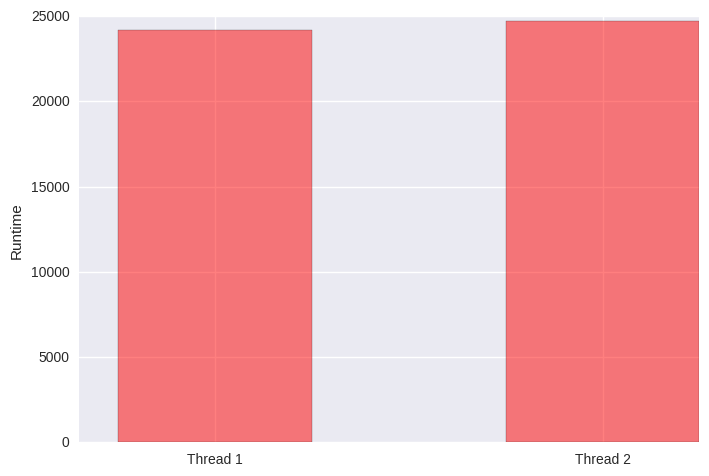

[24153.0, 24684.0]

In [50]:
runs_runtimes = []

fig = plt.figure()

for run in runs:
    runtimes = []

    for i in range(numOfExperiments * numOfRepeats):
        runtimes.append(float(run[i].columns.values[1]))
    
    avg_runtimes = []
    
    sum = 0

    for i in range(numOfExperiments):
        for j in range(numOfRepeats):
            sum += runtimes[(i * j)]
            
        avg_runtimes.append(sum / float(numOfRepeats))
        
    runs_runtimes.append(avg_runtimes)
    
# A stacked bar plot

N = 2

runs_runtimes = [item for sublist in runs_runtimes for item in sublist]

ind = np.arange(N)    # the x locations for the groups
ind = ind + 0.5
width = 0.5       # the width of the bars: can also be len(x) sequence
opacity = 0.5

fig, ax = plt.subplots()

p1 = plt.bar(ind, runs_runtimes, width, color = 'red', alpha = opacity)

plt.ylabel('Runtime')
plt.xticks(ind + (width / 2), ('Thread 1', 'Thread 2'))

plt.show()
fig.savefig('experiment1.png')

runs_runtimes